# AOD

## langley calibration

### load calibration

In [1]:
import helpers

In [2]:
import atmPy.radiation.retrievals.langley_calibration as atmlc

<xarray.Dataset> Size: 168B
Dimensions:     (wavelength: 6)
Coordinates:
  * wavelength  (wavelength) int32 24B 415 500 670 870 940 1625
Data variables:
    V0          (wavelength) float64 48B 7.886 7.241 6.655 7.509 7.718 6.219
    V0_std      (wavelength) float64 48B 0.0 0.0 0.0 0.0 0.0 0.0
    V0_stderr   (wavelength) float64 48B 0.001221 0.001247 ... 0.001458 0.001511

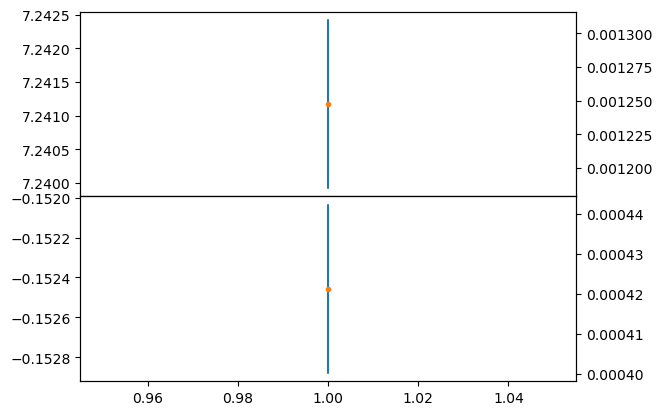

In [3]:
p2fld = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.2/')
lt = atmlc.open_langleys(p2fld)
lt648 = lt
lt.plot_ranked(wl = 500)
lt.V0_simple

In [4]:
import atmPy.radiation.retrievals.spectral_irradiance as atmspec

In [116]:
reload(atmspec)

<module 'atmPy.radiation.retrievals.spectral_irradiance' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py'>

sh: 1: getfattr: not found
sh: 1: getfattr: not found
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
sh: 1: getfattr: not found
sh: 1: getfattr: not found
sh: 1: getfattr: not found
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warni

whatup
Renaming time coordinate to datetime for ozone data.


sh: 1: getfattr: not found
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/core/missing.py:588: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Retrieving precipitable water from 940nm channel using lookup table.


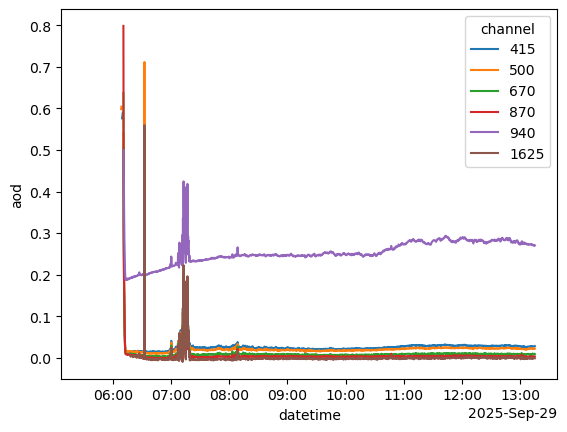

In [117]:
serial_no = 648
fn = '/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250929.nc'
fnmet = '/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250929_preliminary.nc'
ds = xr.open_dataset(fn)
dsmet = xr.open_dataset(fnmet)
gdd = atmspec.CombinedGlobalDiffuseDirect(ds.copy())
gdd.dataset['channel_wavelength'] = gdd.dataset.channel_wavelength.astype(float) #error in processing upstream, fix it in future versions!
gdd = gdd.apply_calibration_langley(lt648)

dni = gdd.direct_normal_irradiation
dni.verbose = True
# dni.raw_data = dni.raw_data.where(dni.raw_data.channel < 1000, drop = True)
dni.met_data = dsmet
# dni.precipitable_water_varname = 'precipitable_water_aeronet'
dni.precipitable_water = '/home/hagen/projecte/mfrsr2pwv/data/pwd_od_lut_648.nc'

dni.met_data = fnmet
# dni.ozone_data = 300
ozone = dsmet.ozone.where(dsmet.ozone != -99.999)
ozone = ozone.interpolate_na('time', method = 'nearest', fill_value = 'extrapolate')
dni.ozone_data = ozone

dni.raw_data.attrs['serial_no'] = serial_no
# dni.mfrsr_history = None
dni.aod.plot.line(x = 'datetime')
dni648 = dni

# how is the product supposed to look like?

In [123]:
dni.raw_data

<xarray.Dataset> Size: 2MB
Dimensions:                    (datetime: 2806, channel: 6, wavelength: 596)
Coordinates:
  * datetime                   (datetime) datetime64[ns] 22kB 2025-09-29 ... ...
  * channel                    (channel) int64 48B 415 500 670 870 940 1625
  * wavelength                 (wavelength) int64 5kB 380 381 382 ... 974 975
Data variables: (12/20)
    alltime                    (datetime, channel) int64 135kB ...
    global_horizontal          (datetime, channel) float64 135kB nan ... 0.06159
    diffuse_horizontal         (datetime, channel) float64 135kB nan ... 0.00...
    channel_wavelength         (channel) float64 48B 413.6 497.1 ... 1.624e+03
    direct_horizontal          (datetime, channel) float64 135kB ...
    cosine_calibraion_direct   (datetime, channel) float64 135kB ...
    ...                         ...
    od_rayleigh                (channel, datetime) float64 135kB 0.26 ... nan
    aod                        (datetime, channel) float64 135kB nan nan ... nan
    precipitable_water         (datetime) float64 22kB nan nan nan ... nan nan
    ozone_absorption_spectrum  (wavelength) float64 5kB 0.0 0.0 0.0 ... 0.0 0.0
    ozon_absoption_by_channel  (channel) float64 48B 0.0003 0.02579 ... 0.0
    od_ozone                   (channel, datetime) float64 135kB 8.805e-05 .....
Attributes: (12/18)
    site_longitude:         -350.161743
    site_latitude:          46.807251
    site_elevation:         0
    site:                   TMP
    site_name:              unknown
    calibrated_irradiance:  False
    ...                     ...
    day_complete:           False
    parent_files:           /nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/64...
    product_version:        0.1
    calibrated_spectral:    True
    clalibration_cosine:    True
    calibrated_langley:     True

In [126]:
drop = ['alltime','toa_spectral_irradiance','ozone_absorption_spectrum', 'ozon_absoption_by_channel', 'wavelength', 'direct_horizontal']
prod = dni.raw_data.drop_vars(drop)
od1625 = dni.od_co2_ch4_h2o.sel(channel = 1625, drop = True)
prod['od_1625nm_co2'] = od1625.co2
prod['od_1625nm_ch4'] = od1625.ch4
prod['od_1625nm_h2o'] = od1625.h2o_5cm

<xarray.Dataset> Size: 1MB
Dimensions:                   (datetime: 2806, channel: 6)
Coordinates:
  * datetime                  (datetime) datetime64[ns] 22kB 2025-09-29 ... 2...
  * channel                   (channel) int64 48B 415 500 670 870 940 1625
Data variables: (12/16)
    global_horizontal         (datetime, channel) float64 135kB nan ... 0.06159
    diffuse_horizontal        (datetime, channel) float64 135kB nan ... 0.004317
    channel_wavelength        (channel) float64 48B 413.6 497.1 ... 1.624e+03
    direct_horizontal         (datetime, channel) float64 135kB ...
    cosine_calibraion_direct  (datetime, channel) float64 135kB ...
    solar_zenith_angle        (datetime) float64 22kB ...
    ...                        ...
    ozone_data                (datetime) float64 22kB 293.5 293.5 ... 298.2
    transmission              (datetime, channel) float64 135kB nan ... 0.9755
    od_rayleigh               (channel, datetime) float64 135kB 0.26 ... nan
    aod                       (datetime, channel) float64 135kB nan nan ... nan
    precipitable_water        (datetime) float64 22kB nan nan nan ... nan nan
    od_ozone                  (channel, datetime) float64 135kB 8.805e-05 ......
Attributes: (12/18)
    site_longitude:         -350.161743
    site_latitude:          46.807251
    site_elevation:         0
    site:                   TMP
    site_name:              unknown
    calibrated_irradiance:  False
    ...                     ...
    day_complete:           False
    parent_files:           /nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/64...
    product_version:        0.1
    calibrated_spectral:    True
    clalibration_cosine:    True
    calibrated_langley:     True

In [129]:
for v in prod:
    print(f'"{v}",')

"global_horizontal",
"diffuse_horizontal",
"channel_wavelength",
"direct_horizontal",
"cosine_calibraion_direct",
"solar_zenith_angle",
"solar_azimuth_angle",
"direct_normal",
"pressure",
"temperature",
"ozone_data",
"transmission",
"od_rayleigh",
"aod",
"precipitable_water",
"od_ozone",


In [ ]:
"aod",
"transmission",
"precipitable_water",
"global_horizontal",
"diffuse_horizontal",
"direct_normal",
"od_rayleigh",
"od_ozone",
"od_1625nm_co2",
"od_1625nm_ch4",
"od_1625nm_h2o",
"channel_wavelength",
"cosine_calibraion_direct",
"solar_zenith_angle",
"solar_azimuth_angle",
"pressure",
"temperature",
"ozone_data",

In [ ]:
od1625 = dni.od_co2_ch4_h2o.sel(channel = 1625, drop = True)
prod['od_1625nm_co2'] = od1625.co2
prod['od_1625nm_ch4'] = od1625.ch4
prod['od_1625nm_h2o'] = od1625.h2o_5cm

In [137]:
od1625

<xarray.Dataset> Size: 90kB
Dimensions:   (datetime: 2806)
Coordinates:
  * datetime  (datetime) datetime64[ns] 22kB 2025-09-29 ... 2025-09-29T15:35:...
Data variables:
    co2       (datetime) float64 22kB nan nan nan nan nan ... nan nan nan nan
    ch4       (datetime) float64 22kB nan nan nan nan nan ... nan nan nan nan
    h2o_5cm   (datetime) float64 22kB nan nan nan nan nan ... nan nan nan nan